# Acceptance rate schedule is robust

In [25]:
import pyabc
from study_abc_noise.model import \
    ConversionReactionModelVars as ModelVars
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import logging
%matplotlib inline

# for debugging
df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Acceptor')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Epsilon')
df_logger.setLevel(logging.DEBUG)

In [17]:
import pyabc
from study_abc_noise.model import \
    ConversionReactionModelVars as ModelVars
#from study_abc_noise.model import \
#    HodgkinHuxleyModelVars as ModelVars
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import logging

# for debugging
df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Acceptor')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Epsilon')
df_logger.setLevel(logging.DEBUG)

# model
mv = ModelVars(n_t=10)

# population size
pop_size = 1000

# data
data = mv.get_model_noisy()(mv.p_true)

In [18]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=pyabc.AcceptanceRateScheme())

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    population_size=pop_size,
    acceptor=acceptor)
abc.new("sqlite:///h_cr_acctemp-v2.db", data)
abc.run(max_nr_populations=np.inf)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-23 21:59:20.833792, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=2.4948e+01 for t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [290.0915958252165].
INFO:ABC:t: 0, eps: 290.0915958252165.
DEBUG:Acceptor:Encountered pd=2.5394e+01 > c=2.4948e+01, thus weight=1.0015e+00.
INFO:ABC:Acceptance rate: 1000 / 3263 = 3.0647e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=2.5394e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures for 1: [114.99659438832444, 145.04579791260824].
INFO:ABC:t: 1, eps: 114.99659438832444.
INFO:ABC:Acceptance rate: 1000 / 3329 = 3.0039e-01, ESS=8.9080e+02.
DEBUG:Acceptor:pdf_norm=2.5394e+01 for t=2.
DEBUG:Epsilon:Proposed temperatures for 2: [83.72391838870998, 57.49829719416222].
INFO:ABC:t: 2, eps: 57.49829719416222.
DEBUG:Acceptor:Encountered pd=2.5592e+01 > c=2.5394e+01, thus weight=1.0035e+00.
DEBUG:Acceptor:Encountered pd=2.5756e+01 > c=2.5394e+01, thus weight=1.0063e+00.
INFO:ABC:Ac

In [19]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=10, schemes=[pyabc.ExpDecayFixedRatioScheme(min_rate=0)])

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    population_size=pop_size,
    acceptor=acceptor)
abc.new("sqlite:///h_cr_temp10-v2.db", data)
abc.run()

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-23 22:01:49.891726, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=2.0113e+01 for t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [10].
INFO:ABC:t: 0, eps: 10.
DEBUG:Acceptor:Encountered pd=2.0583e+01 > c=2.0113e+01, thus weight=1.0481e+00.
DEBUG:Acceptor:Encountered pd=2.1421e+01 > c=2.0113e+01, thus weight=1.1398e+00.
DEBUG:Acceptor:Encountered pd=2.2173e+01 > c=2.0113e+01, thus weight=1.2288e+00.
DEBUG:Acceptor:Encountered pd=2.1163e+01 > c=2.0113e+01, thus weight=1.1108e+00.
DEBUG:Acceptor:Encountered pd=2.2644e+01 > c=2.0113e+01, thus weight=1.2880e+00.
DEBUG:Acceptor:Encountered pd=2.4818e+01 > c=2.0113e+01, thus weight=1.6009e+00.
DEBUG:Acceptor:Encountered pd=2.0652e+01 > c=2.0113e+01, thus weight=1.0555e+00.
DEBUG:Acceptor:Encountered pd=2.0129e+01 > c=2.0113e+01, thus weight=1.0017e+00.
DEBUG:Acceptor:Encountered pd=2.1311e+01 > c=2.0113e+01, thus weight=1.1273e+00.
DEBUG:Acceptor:Encountered

DEBUG:Acceptor:Encountered pd=2.5308e+01 > c=2.0113e+01, thus weight=1.6813e+00.
DEBUG:Acceptor:Encountered pd=2.2618e+01 > c=2.0113e+01, thus weight=1.2848e+00.
DEBUG:Acceptor:Encountered pd=2.3602e+01 > c=2.0113e+01, thus weight=1.4176e+00.
DEBUG:Acceptor:Encountered pd=2.2177e+01 > c=2.0113e+01, thus weight=1.2292e+00.
DEBUG:Acceptor:Encountered pd=2.3245e+01 > c=2.0113e+01, thus weight=1.3678e+00.
DEBUG:Acceptor:Encountered pd=2.2249e+01 > c=2.0113e+01, thus weight=1.2382e+00.
DEBUG:Acceptor:Encountered pd=2.4772e+01 > c=2.0113e+01, thus weight=1.5936e+00.
DEBUG:Acceptor:Encountered pd=2.3342e+01 > c=2.0113e+01, thus weight=1.3812e+00.
DEBUG:Acceptor:Encountered pd=2.0686e+01 > c=2.0113e+01, thus weight=1.0590e+00.
DEBUG:Acceptor:Encountered pd=2.0527e+01 > c=2.0113e+01, thus weight=1.0424e+00.
DEBUG:Acceptor:Encountered pd=2.3459e+01 > c=2.0113e+01, thus weight=1.3974e+00.
DEBUG:Acceptor:Encountered pd=2.5182e+01 > c=2.0113e+01, thus weight=1.6603e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.2241e+01 > c=2.0113e+01, thus weight=1.2372e+00.
DEBUG:Acceptor:Encountered pd=2.3082e+01 > c=2.0113e+01, thus weight=1.3457e+00.
DEBUG:Acceptor:Encountered pd=2.5103e+01 > c=2.0113e+01, thus weight=1.6471e+00.
DEBUG:Acceptor:Encountered pd=2.3881e+01 > c=2.0113e+01, thus weight=1.4576e+00.
DEBUG:Acceptor:Encountered pd=2.3996e+01 > c=2.0113e+01, thus weight=1.4746e+00.
DEBUG:Acceptor:Encountered pd=2.2357e+01 > c=2.0113e+01, thus weight=1.2516e+00.
DEBUG:Acceptor:Encountered pd=2.3269e+01 > c=2.0113e+01, thus weight=1.3712e+00.
DEBUG:Acceptor:Encountered pd=2.2774e+01 > c=2.0113e+01, thus weight=1.3049e+00.
DEBUG:Acceptor:Encountered pd=2.3167e+01 > c=2.0113e+01, thus weight=1.3572e+00.
DEBUG:Acceptor:Encountered pd=2.0162e+01 > c=2.0113e+01, thus weight=1.0050e+00.
DEBUG:Acceptor:Encountered pd=2.3625e+01 > c=2.0113e+01, thus weight=1.4208e+00.
DEBUG:Acceptor:Encountered pd=2.2638e+01 > c=2.0113e+01, thus weight=1.2872e+00.
DEBUG:Acceptor:Encountered p

INFO:ABC:t: 3, eps: 1.25.
INFO:ABC:Acceptance rate: 1000 / 3253 = 3.0741e-01, ESS=7.4549e+02.
DEBUG:Acceptor:pdf_norm=2.5834e+01 for t=4.
DEBUG:Epsilon:Proposed temperatures for 4: [0.625].
INFO:ABC:t: 4, eps: 1.0.
INFO:ABC:Acceptance rate: 1000 / 2380 = 4.2017e-01, ESS=7.3257e+02.
DEBUG:Acceptor:pdf_norm=2.5834e+01 for t=5.
DEBUG:Epsilon:Proposed temperatures for 5: [0.5].
INFO:ABC:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC(id=1, start_time=2020-01-23 22:01:49.891726, end_time=2020-01-23 22:03:03.414653)>


In [20]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=10000, schemes=[pyabc.ExpDecayFixedRatioScheme(min_rate=0)])

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    population_size=pop_size,
    acceptor=acceptor)
abc.new("sqlite:///h_cr_temp10000-v2.db", data)
abc.run(max_nr_populations=np.inf)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-23 22:03:03.526026, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=2.4403e+01 for t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [10000].
INFO:ABC:t: 0, eps: 10000.
INFO:ABC:Acceptance rate: 1000 / 1066 = 9.3809e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=2.4403e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures for 1: [5000.0].
INFO:ABC:t: 1, eps: 5000.0.
DEBUG:Acceptor:Encountered pd=2.4794e+01 > c=2.4403e+01, thus weight=1.0001e+00.
INFO:ABC:Acceptance rate: 1000 / 1127 = 8.8731e-01, ESS=9.3729e+02.
DEBUG:Acceptor:pdf_norm=2.4794e+01 for t=2.
DEBUG:Epsilon:ExpDecayFixedRatioScheme: Reacting to high acceptance rate.
DEBUG:Epsilon:Proposed temperatures for 2: [1250.0].
INFO:ABC:t: 2, eps: 1250.0.
INFO:ABC:Acceptance rate: 1000 / 1481 = 6.7522e-01, ESS=9.4099e+02.
DEBUG:Acceptor:pdf_norm=2.4794e+01 for t=3.
DEBUG:Epsilon:ExpDecayFixedRatioScheme: Reacting to high acceptance rate.
DEBUG:Epsilon:Proposed

In [21]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature(
    initial_temperature=1000, schemes=[pyabc.ExpDecayFixedRatioScheme(min_rate=0)])

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    population_size=pop_size,
    acceptor=acceptor)
abc.new("sqlite:///h_cr_temp1000-v2.db", data)
abc.run(max_nr_populations=np.inf)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-23 22:04:54.588245, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=2.3458e+01 for t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [1000].
INFO:ABC:t: 0, eps: 1000.
DEBUG:Acceptor:Encountered pd=2.5788e+01 > c=2.3458e+01, thus weight=1.0023e+00.
DEBUG:Acceptor:Encountered pd=2.3617e+01 > c=2.3458e+01, thus weight=1.0002e+00.
DEBUG:Acceptor:Encountered pd=2.5659e+01 > c=2.3458e+01, thus weight=1.0022e+00.
INFO:ABC:Acceptance rate: 1000 / 1674 = 5.9737e-01, ESS=1.0000e+03.
DEBUG:Acceptor:pdf_norm=2.5788e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures for 1: [500.0].
INFO:ABC:t: 1, eps: 500.0.
INFO:ABC:Acceptance rate: 1000 / 1826 = 5.4765e-01, ESS=9.0514e+02.
DEBUG:Acceptor:pdf_norm=2.5788e+01 for t=2.
DEBUG:Epsilon:ExpDecayFixedRatioScheme: Reacting to high acceptance rate.
DEBUG:Epsilon:Proposed temperatures for 2: [125.0].
INFO:ABC:t: 2, eps: 125.0.
INFO:ABC:Acceptance rate: 1000 / 3803 = 2.6295e-01, 

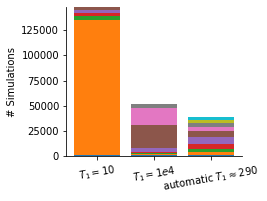

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pyabc

h_acctemp = pyabc.History("sqlite:///h_cr_acctemp-v2.db")
h_temp10 = pyabc.History("sqlite:///h_cr_temp10-v2.db")
h_temp1000 = pyabc.History("sqlite:///h_cr_temp1000-v2.db")
h_temp10000 = pyabc.History("sqlite:///h_cr_temp10000-v2.db")
histories = [h_temp10, h_temp10000, h_acctemp]
labels = [r"$T_1 = 10$", r"$T_1 = 1e4$", r"automatic $T_1 \approx 290$"]

fig, ax = plt.subplots()
pyabc.visualization.plot_sample_numbers(histories, labels, rotation=10, ax=ax)
ax.set_title(None)
ax.set_xlabel(None)
ax.set_ylabel("# Simulations")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.gcf().set_size_inches((3, 3))
for fmt in ['svg', 'eps']:
    plt.savefig(f"cr_fixed_T1.{fmt}", format=fmt)